In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/data/Realestate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)

In [6]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
new_names = ["No", "transaction_date", "house_age", "dist_to_MRT", "conv_store", "lat", "long", "house_price"]
df = df.set_axis(new_names, axis="columns")

In [9]:
df.head()

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.set_index("No")

,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [11]:
print(df.nunique())

No                  414
transaction_date      2
house_age           236
dist_to_MRT         259
conv_store           11
lat                 234
long                232
house_price         270
dtype: int64


In [12]:
dups = df.duplicated()
print(dups.any())

False


In [13]:
df.describe()

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<Axes: >

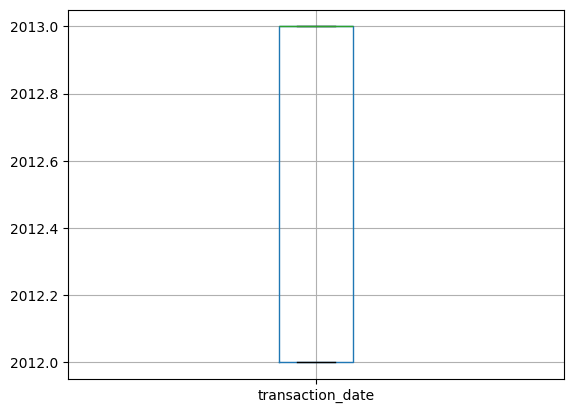

In [14]:
df.boxplot(column=["transaction_date"])

In [15]:
df.boxplot(column=["house_age"])

<Axes: >

In [16]:
df.boxplot(column=["dist_to_MRT"])

<Axes: >

In [17]:
df.boxplot(column=["conv_store"])

<Axes: >

In [18]:
df.boxplot(column=["lat"])

<Axes: >

In [19]:
df.boxplot(column=["long"])

<Axes: >

In [20]:
df.boxplot(column=["house_price"])

<Axes: >

In [21]:
Q1 = df.dist_to_MRT.quantile(0.25)
Q3 = df.dist_to_MRT.quantile(0.75)
IQR = Q3 - Q1
df_1 = df[~((df.dist_to_MRT < (Q1 - 1.5 * IQR)) | (df.dist_to_MRT > (Q3 + 1.5 * IQR)))] # df['dist_to_MRT']
print(df.shape)
print(df_1.shape)

(414, 8)
(377, 8)


In [22]:
Q1 = df_1.lat.quantile(0.25)
Q3 = df_1.lat.quantile(0.75)
IQR = Q3 - Q1
df_2 = df_1[~((df_1.lat < (Q1 - 1.5 * IQR)) | (df_1.lat > (Q3 + 1.5 * IQR)))]
print(df_1.shape)
print(df_2.shape)

(377, 8)
(376, 8)


In [23]:
Q1 = df_2.long.quantile(0.25)
Q3 = df_2.long.quantile(0.75)
IQR = Q3 - Q1
df_3 = df_2[~((df_2.long < (Q1 - 1.5 * IQR)) | (df_2.long > (Q3 + 1.5 * IQR)))]
print(df_2.shape)
print(df_3.shape)

(376, 8)
(315, 8)


In [24]:
Q1 = df_3.house_price.quantile(0.25)
Q3 = df_3.house_price.quantile(0.75)
IQR = Q3 - Q1
df_4 = df_3[~((df_3.house_price < (Q1 - 1.5 * IQR)) | (df_3.house_price > (Q3 + 1.5 * IQR)))]
print(df_3.shape)
print(df_4.shape)

(315, 8)
(303, 8)


In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_5 = df [~((df < (Q1 - 1.5 * IQR )) | (df > (Q3 + 1.5* IQR))).any(axis=1)]
print(df.shape)
print(df_5.shape)

(414, 8)
(371, 8)


In [26]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 413
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                371 non-null    int64  
 1   transaction_date  371 non-null    int32  
 2   house_age         371 non-null    float64
 3   dist_to_MRT       371 non-null    float64
 4   conv_store        371 non-null    int64  
 5   lat               371 non-null    float64
 6   long              371 non-null    float64
 7   house_price       371 non-null    float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 24.6 KB


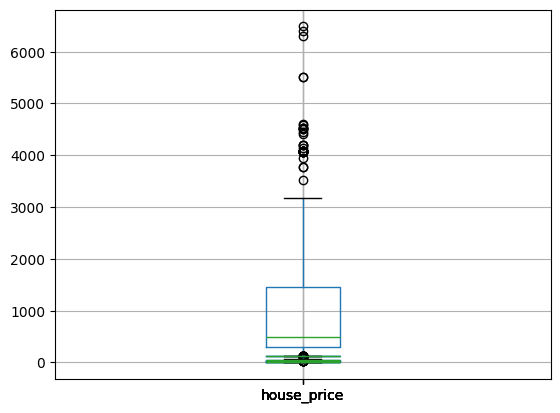

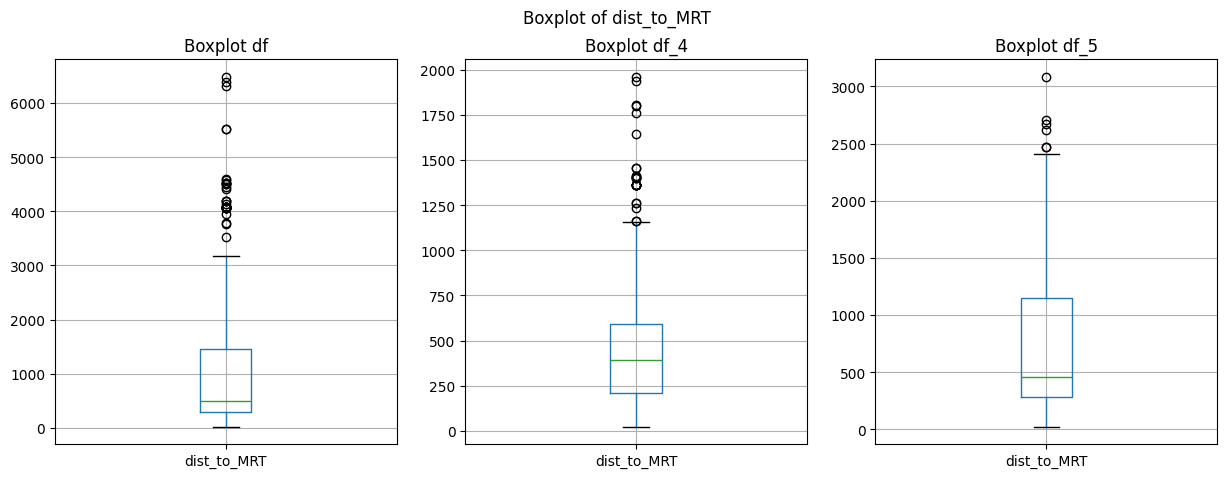

In [27]:
import matplotlib.pyplot as plt

# Membuat subplot dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot untuk df
df.boxplot(column=["dist_to_MRT"], ax=axes[0])
axes[0].set_title("Boxplot df")

# Boxplot untuk df_4
df_4.boxplot(column=["dist_to_MRT"], ax=axes[1])
axes[1].set_title("Boxplot df_4")

# Boxplot untuk df_5
df_5.boxplot(column=["dist_to_MRT"], ax=axes[2])
axes[2].set_title("Boxplot df_5")

# Mengatur judul keseluruhan
plt.suptitle("Boxplot of dist_to_MRT")

# Menampilkan plot
plt.show()

In [28]:
df.columns

Index(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long', 'house_price'],
      dtype='object')

In [29]:
# menggunakan scatterplots untuk cek hubungan linier antara house price dengan kolom lainnya
p = sns.pairplot(df, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

In [30]:
#cek data setelah dikeluarkan outliernya
p = sns.pairplot(df_4, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

In [31]:
p = sns.pairplot(df_5, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

In [32]:
df_model_house_age_l_20 = df[df['house_age'] < 20]
df_model_house_age_m_20 = df[df['house_age']> 20]

In [33]:
p = sns.pairplot(df_model_house_age_l_20, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

In [34]:
p = sns.pairplot(df_model_house_age_m_20, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

In [35]:
sns.heatmap(df.corr(), annot= True)

<Axes: >

In [36]:
sns.heatmap(df_4.corr(), annot= True)

<Axes: >

In [37]:
sns.heatmap(df_5.corr(), annot= True)

<Axes: >

In [38]:
sns.heatmap(df_model_house_age_l_20.corr(), annot= True)

<Axes: >

In [39]:
sns.heatmap(df_model_house_age_m_20.corr(), annot= True)

<Axes: >

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(['house_price'],axis=1) # data fitur/prediktor
y = df.house_price # target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X_train, y_train)

LinearRegression()

In [42]:
reg.coef_

array([-5.30413265e-03,  2.68096447e+00, -2.66453987e-01, -4.40560439e-03,
        1.11189597e+00,  2.33291255e+02, -1.39919126e+01])

In [43]:
y_pred = reg.predict(X_test)
y_pred

array([38.98583161, 13.104198  , 41.74054363, 12.06317213, 40.91304714,
       40.23775488, 41.00955577, 35.90941863, 49.80659265, 44.9922497 ,
       45.50474025, 42.4516471 , 38.14279633, 41.09032116, 46.07379506,
       37.37687329, 40.38034933, 41.01129854, 41.09404069, 41.71922144,
       49.56787771, 32.424555  , 38.41063178, 47.47261579, 45.78450396,
       42.23371425, 45.80987366, 26.54279937, 47.57416869, 20.42347795,
       42.8460876 , 33.56409693, 43.00413941, 37.89257859, 42.88023863,
       30.68985415, 47.8967069 , 40.19216462, 52.73414137,  7.51269689,
       51.22572211, 33.00475213, 33.41570795, 47.85450594, 14.86139178,
       43.82643854, 42.5369668 , 12.28884439, 34.34518906, 46.82947542,
       51.65908557, 40.36405957, 48.199612  , 24.92946369, 31.88365821,
       33.32607904, 48.45566043, 41.68045411, 43.35999212, 33.56459588,
       43.02618827, 43.76211504, 40.83283534, 46.73917491, 37.60934539,
       30.96462021, 11.25570729, 34.46751544, 47.7062734 , 41.72

In [44]:
from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y_test, y_pred))

r2 Score :  0.65894310082634


In [45]:
df_4.columns

Index(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long', 'house_price'],
      dtype='object')

In [46]:
df_4['trans_dist_to_MRT'] =  np.log(df_4.dist_to_MRT.copy())
p = sns.pairplot(df_4, x_vars=['trans_dist_to_MRT'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Temp\ipykernel_5844\2406630893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['trans_dist_to_MRT'] =  np.log(df_4.dist_to_MRT.copy())
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

In [47]:
df_5['trans_dist_to_MRT'] =  np.log(df_5.dist_to_MRT.copy())
p = sns.pairplot(df_5, x_vars=['trans_dist_to_MRT'], y_vars= 'house_price', size=4, aspect=0.7)

C:\Users\andri\AppData\Local\Temp\ipykernel_5844\1978765429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['trans_dist_to_MRT'] =  np.log(df_5.dist_to_MRT.copy())
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#X_1 = df_4.drop(['house_price','transaction_date', 'house_age', 'conv_store','lat', 'trans_dist_to_mrt'],axis=1)
#X_1 = df_4.drop(['house_price','transaction_date','long'],axis=1)
#X_1 = df_4.drop(['No', 'transaction_date', 'house_age', 'conv_store','lat', 'long','trans_dist_to_mrt', 'house_price'],axis=1)

X_1 = df_5[['house_age', 'dist_to_MRT', 'conv_store']].copy()
X_2 = df_5[['house_age', 'trans_dist_to_MRT', 'conv_store']].copy()
X_3 = df[['house_age', 'dist_to_MRT', 'conv_store']].copy()
y = df_5['house_price']
y1 = df['house_price']

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.05, random_state=0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.05, random_state=0)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y1, test_size=0.05, random_state=0)

reg_1 = LinearRegression()
reg_1.fit(X_1_train, y_1_train)
reg_2 = LinearRegression()
reg_2.fit(X_2_train, y_2_train)
reg_3 = LinearRegression()
reg_3.fit(X_3_train, y_3_train)

print('Data bersih')
print(f'reg_1.coef_: {reg_1.coef_}')
y_1_pred = reg_1.predict(X_1_test)
print('R-squared Score for model reg_1: ', r2_score(y_1_test, y_1_pred))
print('MAE',mean_absolute_error(y_1_test, y_1_pred))
print('MSE',mean_squared_error(y_1_test, y_1_pred))

print('\nData bersih yang di logaritma')
print(f'reg_2.coef_: {reg_2.coef_}')
y_2_pred = reg_2.predict(X_2_test)
print('R-squared Score for model reg_2: ', r2_score(y_2_test, y_2_pred))

print('\nDataset awal')
print(f'reg_3.coef_: {reg_3.coef_}')
y_3_pred = reg_3.predict(X_3_test)
print('R-squared Score for model reg_2: ', r2_score(y_3_test, y_3_pred))

Data bersih
reg_1.coef_: [-0.29053418 -0.00966625  0.99473337]
R-squared Score for model reg_1:  0.8468017926264861
MAE 3.2828345404275985
MSE 15.541919944584071

Data bersih yang di logaritma
reg_2.coef_: [-0.23159447 -6.7588072   0.84592078]
R-squared Score for model reg_2:  0.8683864645125883

Dataset awal
reg_3.coef_: [-0.25405011 -0.00528864  1.35230683]
R-squared Score for model reg_2:  0.6846124290768218


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Membaca data DataFrame df_4 seperti yang Anda lakukan sebelumnya

# Memisahkan fitur dan target
X_1 = df_5[['house_age', 'dist_to_MRT', 'conv_store']].copy()
X_2 = df_5[['house_age', 'trans_dist_to_MRT', 'conv_store']].copy()
y = df_5['house_price']

# Normalisasi fitur
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)

# Memisahkan data menjadi data latih dan data uji
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.05, random_state=0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.05, random_state=0)

# Parameter untuk MLPRegressor
params = {
    'hidden_layer_sizes': (15, 10),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0,
    'batch_size': 10,
    'random_state': 0,
    'tol': 0.0001,
    'nesterovs_momentum': False,
    'learning_rate': 'constant',
    'learning_rate_init': 0.01,
    'max_iter': 500,
    'shuffle': True,
    'n_iter_no_change': 50,
    'verbose': False
}

# Membuat model MLPRegressor
regressor_1 = MLPRegressor(**params)
regressor_2 = MLPRegressor(**params)

# Melatih model
regressor_1.fit(X_1_train, y_1_train)
regressor_2.fit(X_2_train, y_2_train)

# Membuat prediksi
y_1_pred = regressor_1.predict(X_1_test)
y_2_pred = regressor_2.predict(X_2_test)

# Menghitung metrik evaluasi untuk y1
mae1 = mean_absolute_error(y_1_test, y_1_pred)
mse1 = mean_squared_error(y_1_test, y_1_pred)
r_squared1 = r2_score(y_1_test, y_1_pred)
print('MLP Regressor for X_1')
print('MAE:', mae1)
print('MSE:', mse1)
print('R^2:', r_squared1)

# Menghitung metrik evaluasi untuk y2
mae2 = mean_absolute_error(y_2_test, y_2_pred)
mse2 = mean_squared_error(y_2_test, y_2_pred)
r_squared2 = r2_score(y_2_test, y_2_pred)
print("")
print('MLP Regressor for X_2')
print('MAE:', mae2)
print('MSE:', mse2)
print('R^2:', r_squared2)

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor for X_1
MAE: 3.364469972765914
MSE: 21.07956355497957
R^2: 0.7922167042197213

MLP Regressor for X_2
MAE: 4.038493745902419
MSE: 22.347293157094928
R^2: 0.7797205709767954


C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
import os
import pickle

# Ganti path dengan direktori yang Anda inginkan
directory = "C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/models"

if not os.path.exists(directory):
    os.makedirs(directory)

# Path untuk menyimpan model linear regression (reg_1) dalam file pickle
path_linear_regression = "C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/models/linear_regression.pkl"

# Simpan model linear regression (reg_1) ke dalam file pickle
with open(path_linear_regression, "wb") as file:
    pickle.dump(reg_1, file)

# Path untuk menyimpan model MLP (regressor_1) dalam file pickle
path_mlp_regressor = "C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/models/mlp_regressor.pkl"

# Simpan model MLP (regressor_1) ke dalam file pickle
with open(path_mlp_regressor, "wb") as file:
    pickle.dump(regressor_1, file)

print("Models saved successfully.")

Models saved successfully.


In [51]:
import pickle

# Muat model linear regression (reg_1) dari file pickle
with open('C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/models/linear_regression.pkl', 'rb') as file:
    loaded_model_linear_regression = pickle.load(file)

# Muat model MLP (regressor_1) dari file pickle
with open('C:/Users/andri/Documents/Andri Martin/Coding/Prediksi/models/mlp_regressor.pkl', 'rb') as file:
    loaded_model_mlp_regressor = pickle.load(file)


In [52]:
import numpy as np

# Fungsi untuk memprediksi harga rumah dengan model (linear regression atau MLP)
def predict_price(model, house_age, dist_to_MRT, conv_store):
    # Persiapkan data input dengan format yang sesuai dengan model
    input_data = np.array([[house_age, dist_to_MRT, conv_store]])

    # Lakukan prediksi dengan model yang sudah dilatih (model)
    predicted_price = model.predict(input_data)

    return predicted_price[0]

In [53]:
df_5

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price,trans_dist_to_MRT
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603
...,...,...,...,...,...,...,...,...,...
408,409,2013,18.5,2175.74400,3,24.96330,121.51243,28.1,7.685126
410,411,2012,5.6,90.45606,9,24.97433,121.54310,50.0,4.504864
411,412,2013,18.8,390.96960,7,24.97923,121.53986,40.6,5.968630
412,413,2013,8.1,104.81010,5,24.96674,121.54067,52.5,4.652150


In [54]:
# Meminta input dari pengguna
house_age = float(input("Masukkan usia rumah: "))
dist_to_MRT = float(input("Masukkan jarak ke stasiun MRT: "))
conv_store = int(input("Masukkan jumlah toko konvenien di sekitar: "))

# Menggunakan model linear regression (reg_1) yang sudah dimuat
predicted_price_linear_regression = predict_price(loaded_model_linear_regression, house_age, dist_to_MRT, conv_store)
print("Prediksi Harga Rumah (Linear Regression):", predicted_price_linear_regression)

# Menggunakan model MLP (regressor_1) yang sudah dimuat
predicted_price_mlp_regressor = predict_price(loaded_model_mlp_regressor, house_age, dist_to_MRT, conv_store)
print("Prediksi Harga Rumah (MLP):", predicted_price_mlp_regressor)

Prediksi Harga Rumah (Linear Regression): 54.035035485516126
Prediksi Harga Rumah (MLP): 204.59505197848017


C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
